In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
CIP_data = pd.read_csv("CIP_data_encode_prev.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


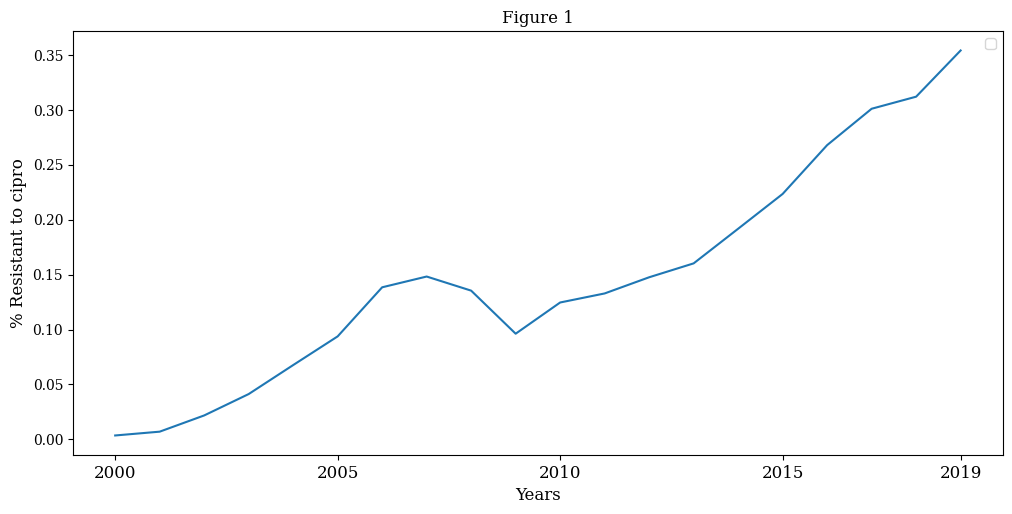

In [2]:
### Plotting ciprofloxacin by year 

xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)
plt.rcParams["font.family"] = "serif"## read data 

years = CIP_data["YEAR"].unique()
reistance_by_year_overall = []
reistance_by_year_all = pd.DataFrame() 
for year in years:
    CIP_data_year = CIP_data.loc[CIP_data['YEAR'] == year]
    reistance_by_year_overall.append(1 - CIP_data_year["Susceptible"].sum()/len(CIP_data_year))


plt.plot(years, reistance_by_year_overall)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to cipro", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()


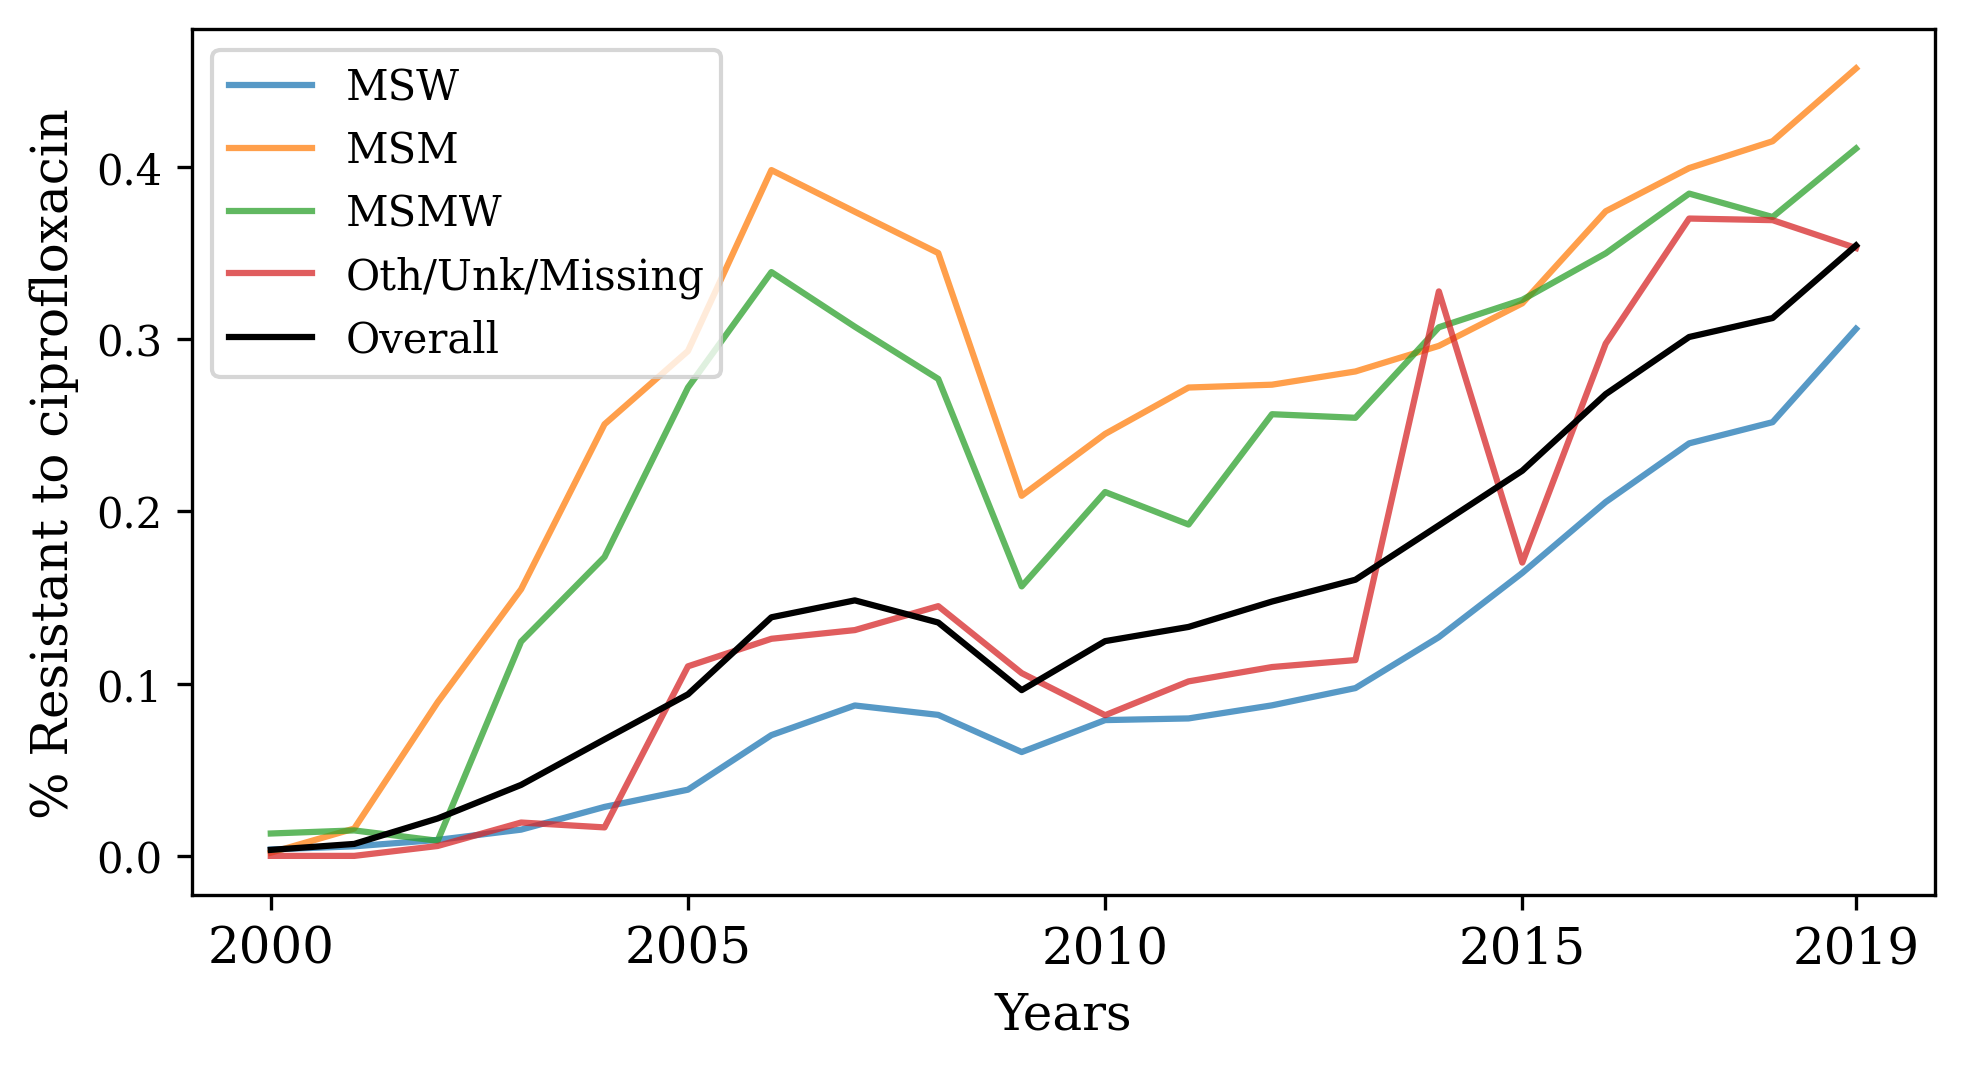

In [3]:
## By sexual partner
xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
genders = CIP_data["GENDERSP"].unique()



plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for gender in genders:

    CIP_data_region = CIP_data.loc[CIP_data['GENDERSP'] == gender]
    reistance_by_year = []
    for year in years:
        CIP_data_region_year = CIP_data_region.loc[CIP_data_region['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_region_year["Susceptible"].sum()/len(CIP_data_region_year))
        
    plt.plot(years, reistance_by_year, label=gender, alpha=0.75)

plt.plot(years, reistance_by_year_overall, color = "black", label = "Overall")

legend_labels = [genders, 'Overall']


#plt.plot(years, reistance_by_year)
#plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to ciprofloxacin", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()
#labels  = legend_labels 

Southwest [0.0, 0.0, 0.0014792899408283544, 0.01273148148148151, 0.0394144144144144, 0.039215686274509776, 0.05629477993858756, 0.09311740890688258, 0.06292906178489699, 0.08020698576972829, 0.09219858156028371, 0.09291338582677167, 0.09759547383309763, 0.10888252148997135, 0.11605415860735013, 0.19483101391650104, 0.23396226415094334, 0.22153209109730854, 0.23333333333333328, 0.3027888446215139]
West [0.010291595197255532, 0.019822639540949427, 0.05649717514124297, 0.10067396798652062, 0.14193548387096777, 0.17269402681836654, 0.2558836114676937, 0.24668955370279544, 0.24556541019955658, 0.15806805708013172, 0.20733571064696887, 0.22867803837953093, 0.25, 0.2721552176192973, 0.2857142857142857, 0.28216454997239093, 0.32926181625066386, 0.3579725448785639, 0.37459634015069965, 0.4002026342451874]
Southeast [0.0008658008658009031, 0.0, 0.0009587727708533222, 0.004654771140418901, 0.019629225736095934, 0.04052780395852973, 0.07023060796645697, 0.12990654205607477, 0.1218450826805918, 0.0

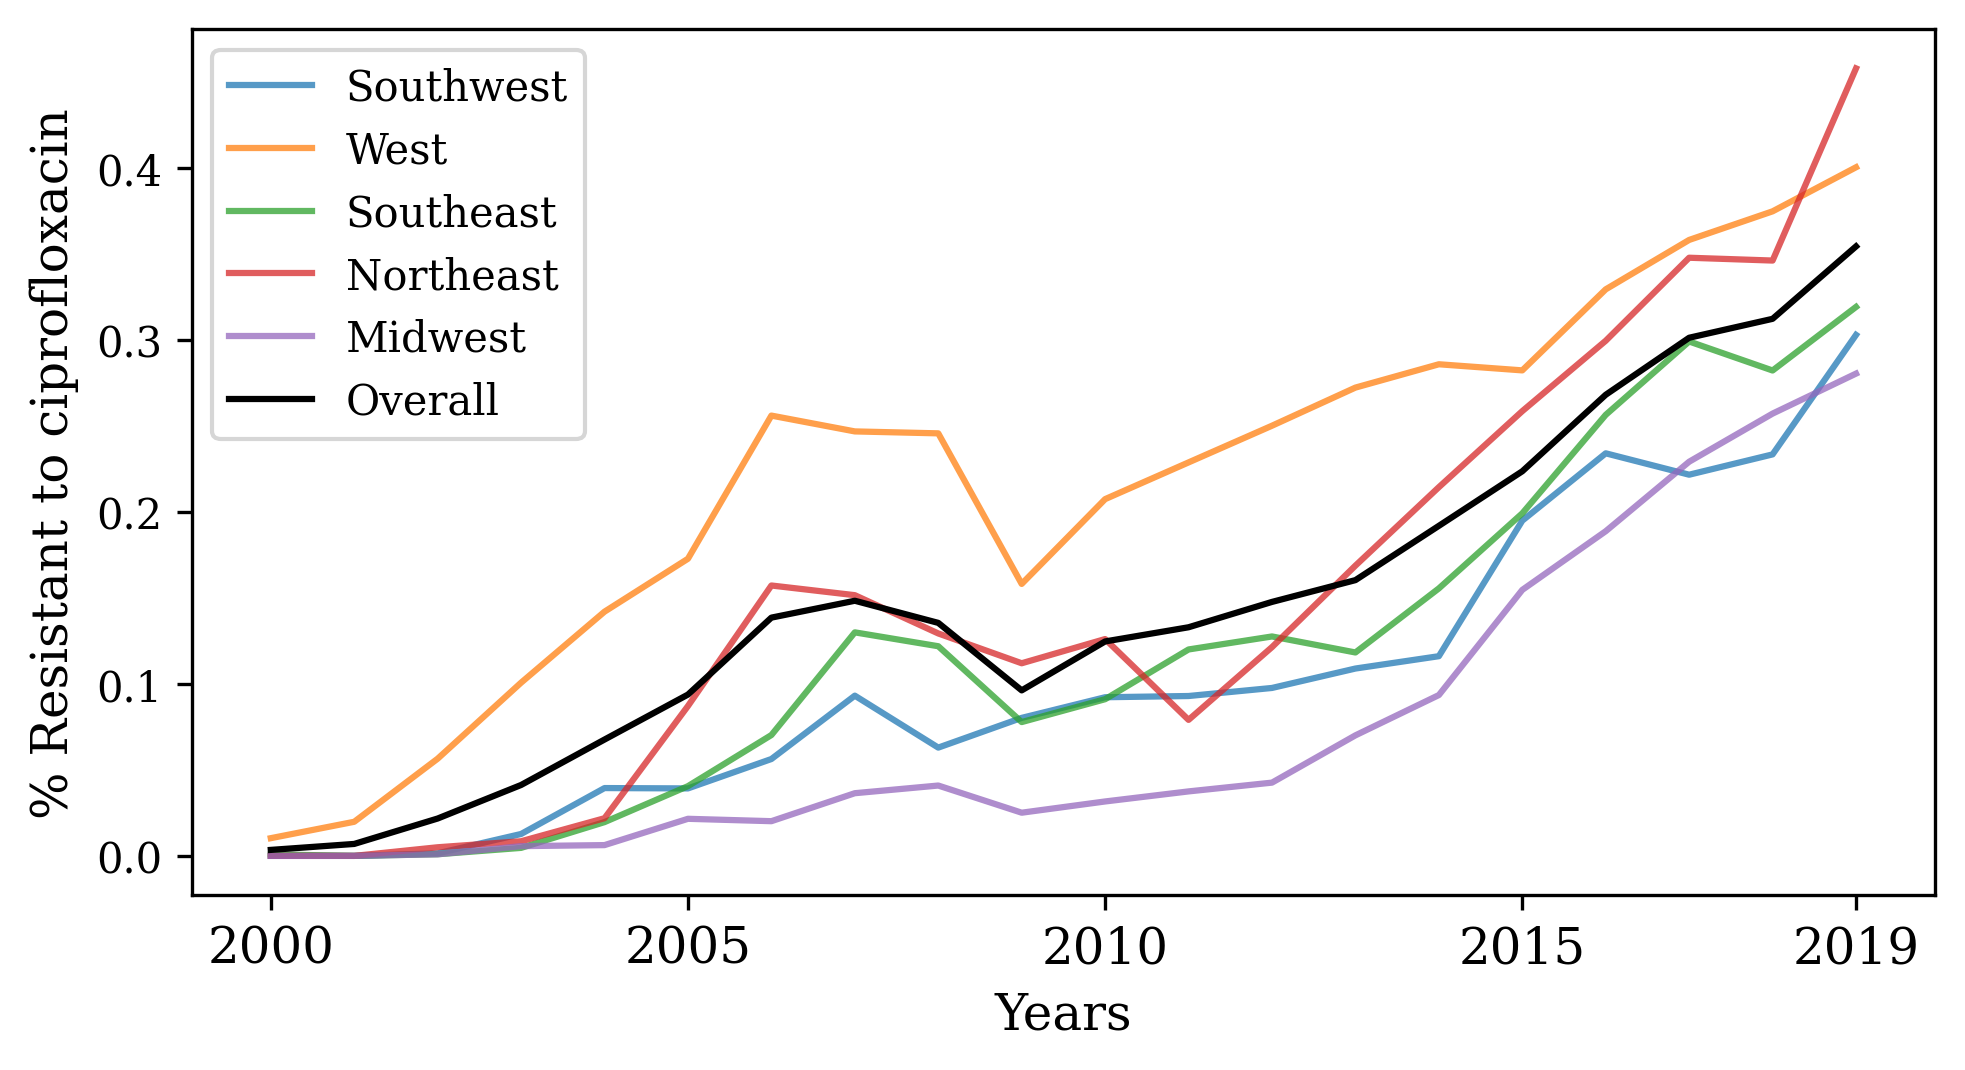

In [6]:
## By region
xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
regions = CIP_data["REGION"].unique()



plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for region in regions:
    CIP_data_region = CIP_data.loc[CIP_data['REGION'] == region]
    reistance_by_year = []
    for year in years:
        CIP_data_region_year = CIP_data_region.loc[CIP_data_region['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_region_year["Susceptible"].sum()/len(CIP_data_region_year))
    plt.plot(years, reistance_by_year, label=region, alpha=0.75)
    print(region, reistance_by_year)

plt.plot(years, reistance_by_year_overall, color = "black", label = "Overall")

legend_labels = [regions, 'Overall']


#plt.plot(years, reistance_by_year)
#plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to ciprofloxacin", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()
#labels  = legend_labels 

In [9]:
## Just 2010 for paper
regions = CIP_data["REGION"].unique()
reistance_by_region_2010 = []
#reistance_by_year_all = pd.DataFrame()
for region in regions:
    CIP_data_region = CIP_data.loc[CIP_data['REGION'] == region]

    CIP_data_region_year = CIP_data_region.loc[CIP_data_region['YEAR'] == 2010]

    reistance_by_region_2010.append(1 - CIP_data_region_year["Susceptible"].sum()/len(CIP_data_region_year))
print(reistance_by_region_2010) 
print(regions) 

[0.09219858156028371, 0.20733571064696887, 0.09105960264900659, 0.1260162601626016, 0.031627906976744224]
['Southwest' 'West' 'Southeast' 'Northeast' 'Midwest']


##By location
 xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
clinics = CIP_data["CLINIC"].unique()



plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for clinic in clinics:
    CIP_data_clinic = CIP_data.loc[CIP_data['CLINIC'] == clinic]
    reistance_by_year = []
    for year in years:
        CIP_data_clinic_year = CIP_data_clinic.loc[CIP_data_clinic['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_clinic_year["Susceptible"].sum()/len(CIP_data_clinic_year))
        
    plt.plot(years, reistance_by_year, label=clinic, alpha=0.75)

#  



#plt.plot(years, reistance_by_year)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to cipro", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()


In [16]:
######### Now see the number of samples in the test and training dataset 

train_data = CIP_data.loc[CIP_data['YEAR'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])]
print(len(train_data))
            # test
test_data = CIP_data.loc[CIP_data['YEAR'].isin([2011])]
#test_data = CIP_data.loc[CIP_data['YEAR'].isin([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]

print(len(test_data))

64445 + 48042 #48042 is the number in 2011-2019

64445
5464


112487

In [15]:
## Just 2007 for paper
clinics = CIP_data["CLINIC"].unique()
reistance_by_clinic_2007 = []
#reistance_by_year_all = pd.DataFrame()
for clinic in clinics:
    CIP_data_clinic = CIP_data.loc[CIP_data['CLINIC'] == clinic]

    CIP_data_clinic_year = CIP_data_clinic.loc[CIP_data_clinic['YEAR'] == 2007]
    reistance_by_clinic_2007.append(1 - CIP_data_clinic_year["Susceptible"].sum()/len(CIP_data_clinic_year["Susceptible"]))
print(reistance_by_clinic_2007) 
print(clinics) 
print(min(reistance_by_clinic_2007))
print(max(reistance_by_clinic_2007))

[0.16666666666666663, nan, 0.02564102564102566, 0.020270270270270285, 0.09352517985611508, nan, nan, nan, 0.08582089552238803, 0.011673151750972721, 0.007017543859649145, nan, 0.07457627118644072, 0.16972477064220182, 0.01736111111111116, nan, 0.052631578947368474, 0.2857142857142857, nan, nan, 0.1636363636363637, 0.22424242424242424, 0.30434782608695654, 0.18666666666666665, 0.19548872180451127, nan, 0.1071428571428571, 0.1807228915662651, 0.149171270718232, 0.05964912280701751, 0.41025641025641024, 0.2907801418439716, 0.08727272727272728, nan, 0.2857142857142857, 0.1785714285714286, 0.3631578947368421, 0.29255319148936165, 0.31333333333333335, nan, nan, nan]
['ALB' 'ANC' 'ATL' 'BAL' 'BHM' 'BOS' 'BUF' 'CAM' 'CHI' 'CIN' 'CLE' 'COL'
 'DAL' 'DEN' 'DTR' 'FBG' 'GRB' 'HON' 'IND' 'JAC' 'KCY' 'LAX' 'LBC' 'LVG'
 'MIA' 'MIL' 'MIN' 'NOR' 'NYC' 'OKC' 'ORA' 'PHI' 'PHX' 'PON' 'POR' 'RIC'
 'SDG' 'SEA' 'SFO' 'SLC' 'STL' 'WDC']
0.007017543859649145
0.41025641025641024


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_9467/3870218773.py:9: RuntimeWarning: invalid value encountered in long_scalars
  reistance_by_clinic_2007.append(1 - CIP_data_clinic_year["Susceptible"].sum()/len(CIP_data_clinic_year["Susceptible"]))


Check MSM 

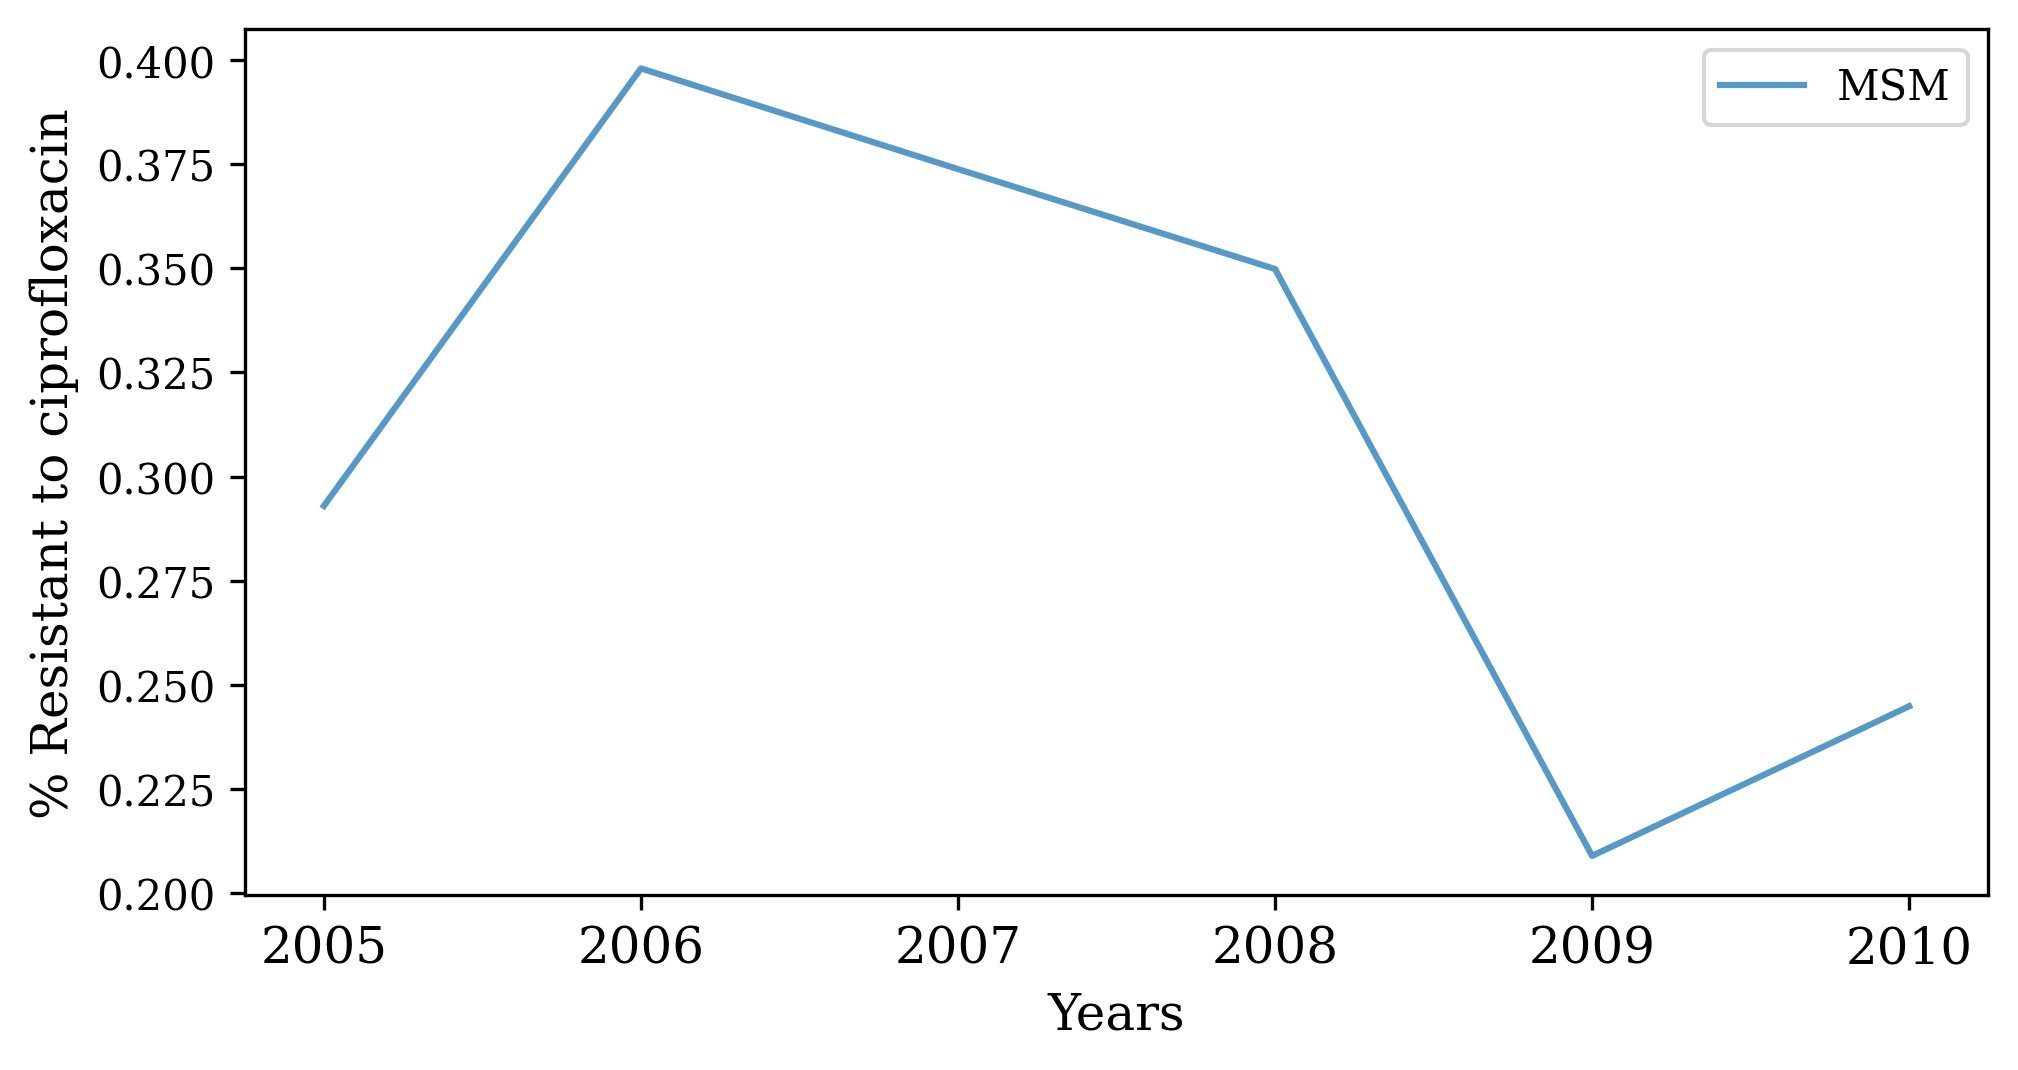

In [22]:
## By sexual partner
xAxisYears = [2005, 2006, 2007, 2008, 2009, 2010]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
genders = CIP_data["GENDERSP"].unique()


years = range(2005, 2011)
plt.subplots(figsize=(7.5, 3.75))
prop_MSM = []
#reistance_by_year_all = pd.DataFrame()
for gender in genders:
    if gender == 'MSM':
        CIP_data_region = CIP_data.loc[CIP_data['GENDERSP'] == gender]
        
        reistance_by_year = []
        for year in years:
            
            CIP_data_region_year = CIP_data_region.loc[CIP_data_region['YEAR'] == year]
            prop_MSM.append(len(CIP_data_region_year)/len(CIP_data.loc[CIP_data['YEAR'] == year]) * 100)
            reistance_by_year.append(1 - CIP_data_region_year["Susceptible"].sum()/len(CIP_data_region_year))
            
        plt.plot(years, reistance_by_year, label=gender, alpha=0.75)

#plt.plot(years, reistance_by_year_overall, color = "black", label = "Overall")

legend_labels = [genders, 'Overall']


#plt.plot(years, reistance_by_year)
#plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to ciprofloxacin", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()
#labels  = legend_labels 

In [23]:
np.mean(prop_MSM)

19.29177577207119